# Import Package

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Import dữ liệu từ file

In [ ]:
# Nhập dữ liệu
cale4  = pd.read_csv('https://media.githubusercontent.com/media/minhhieu9800/Python-MSE/main/Data/calendar.csv')
sale2  = pd.read_csv('https://media.githubusercontent.com/media/minhhieu9800/Python-MSE/main/Data/sales_train_validation.csv')
prices = pd.read_csv('https://media.githubusercontent.com/media/minhhieu9800/Python-MSE/main/Data/sell_prices.csv')

In [ ]:
# Kiểm tra dữ liệu đã nhập
cale4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          1969 non-null   object
 1   wm_yr_wk      1969 non-null   int64 
 2   weekday       1969 non-null   object
 3   wday          1969 non-null   int64 
 4   month         1969 non-null   int64 
 5   year          1969 non-null   int64 
 6   d             1969 non-null   object
 7   event_name_1  162 non-null    object
 8   event_type_1  162 non-null    object
 9   event_name_2  5 non-null      object
 10  event_type_2  5 non-null      object
 11  snap_CA       1969 non-null   int64 
 12  snap_TX       1969 non-null   int64 
 13  snap_WI       1969 non-null   int64 
dtypes: int64(7), object(7)
memory usage: 215.5+ KB


In [ ]:
# Kiểm tra 3 dòng đầu của data đã nhập
cale4.head(3)

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0


In [ ]:
import datetime

# Đổi tên từng column d_1 ... d_1913 thành ngày
x = datetime.date(2011,1,29)
for c in ((sale2.columns)[6:]):
    sale2.rename(columns={c:x},inplace=True)
    x = x + datetime.timedelta(days=1)
d_cols = sale2.columns[6:]

In [ ]:
sale2['total_sales_all_days'] = sale2[d_cols].sum(axis = 1)

In [ ]:
sale2.head(3)

,id,item_id,dept_id,cat_id,store_id,state_id,2011-01-29,2011-01-30,2011-01-31,2011-02-01,...,2016-04-17,2016-04-18,2016-04-19,2016-04-20,2016-04-21,2016-04-22,2016-04-23,2016-04-24,2016-04-25,total_sales_all_days
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,1,1,1,3,0,1,1,NaN,600.0
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,1,0,0,0,0,NaN,493.0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,1,0,1,1,1,NaN,288.0


In [ ]:
X = sale2
X = X.groupby(X.columns.map(lambda x : x if type(x) == str else x.strftime('%Y-%m')),axis=1).sum()
for c in ((X.columns)[:-6]):
    x= datetime.datetime.strptime(c, '%Y-%m').date()
    X.rename(columns={c:x},inplace=True)
X

ValueError: ignored

# Bài tập mẫu

## Tổng số sản phẩm bán theo Mặt hàng

In [ ]:
F = X.groupby(['cat_id'])[(X.columns)[:-6]].sum()

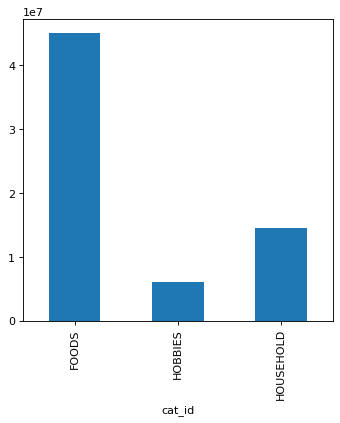

In [ ]:
plt.figure(num=None, figsize=(5,5), dpi=80, facecolor='w', edgecolor='k')
(F.sum(axis=1)).plot.bar()
plt.show()

## Doanh thu tháng theo từng Bang

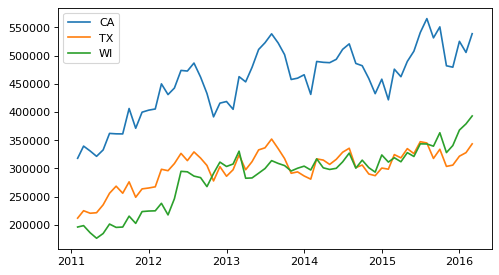

In [ ]:
F = X.groupby(['state_id'])[(X.columns)[:-6]].sum()
plt.figure(num=None, figsize=(7, 4), dpi=80, facecolor='w', edgecolor='k')
for i in range(3):
    plt.plot(F.iloc[i,1:-1],label=F.index[i])
    plt.legend(loc='best')
plt.show()

## Tỉ lệ ngày lễ và ngày thường

In [ ]:
Non_events = cale4.date.count() - cale4.event_name_1.count()
Events = cale4.event_name_1.count()

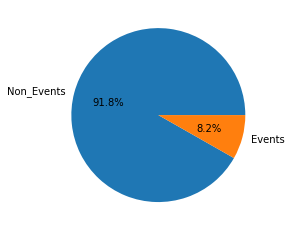

In [ ]:
pd.Series([Non_events,Events], ['Non_Events',"Events"],name="").plot.pie(autopct='%1.1f%%')
plt.show()

# Bài tập tự làm

## Tổng số doanh thu bán theo Bang

In [ ]:
F = X.groupby(['state_id', 'store_id', 'cat_id'])[(X.columns)[:-6]].sum()
F

2011-01-01  2011-02-01  2011-03-01  2011-04-01  \
state_id store_id cat_id                                                      
CA       CA_1     FOODS            8384       65123       67297       63615   
                  HOBBIES          1469       12212       12682       13280   
                  HOUSEHOLD        1455       12099       13489       14658   
         CA_2     FOODS            5403       41966       44135       43224   
                  HOBBIES          1303        9998       11529       11120   
                  HOUSEHOLD        1955       15722       18300       18459   
         CA_3     FOODS            9682       86645       89879       85297   
                  HOBBIES          1418       11505       12413       12774   
                  HOUSEHOLD        2251       21642       25052       24357   
         CA_4     FOODS            3438       29339       31061       31040   
                  HOBBIES           645        6110        6878        6395   
                  HOUSEHOLD         705        5740        6963        6785   
TX       TX_1     FOODS            5061       44407       48515       48146   
                  HOBBIES           622        5267        5263        5740   
                  HOUSEHOLD        1382       12860       13112       12549   
         TX_2     FOODS            7740       62045       65613       62523   
                  HOBBIES           973        7846        7970        8321   
                  HOUSEHOLD        1807       15009       16319       16839   
         TX_3     FOODS            6206       48697       50633       48478   
                  HOBBIES           680        4720        5266        5886   
                  HOUSEHOLD        1375       11164       12471       12199   
WI       WI_1     FOODS            3885       27448       27847       25935   
                  HOBBIES          1381        9331       10384       10508   
                  HOUSEHOLD        1194        9813       11516       10455   
         WI_2     FOODS            4634       38553       36626       33614   
                  HOBBIES           430        3315        3419        3909   
                  HOUSEHOLD        1132        9840       11068       10128   
         WI_3     FOODS            8677       76027       73308       67696   
                  HOBBIES           882        7058        7887        8266   
                  HOUSEHOLD        1994       14874       16672       15517   

                             2011-05-01  2011-06-01  2011-07-01  2011-08-01  \
state_id store_id cat_id                                                      
CA       CA_1     FOODS           61084       62833       67869       65872   
                  HOBBIES         12957       12908       12925       12949   
                  HOUSEHOLD       13947       14635       15967       16292   
         CA_2     FOODS           39269       41794       46962       45113   
                  HOBBIES         10717        9752       11487       10302   
                  HOUSEHOLD       18319       17834       20607       19714   
         CA_3     FOODS           82300       89390       95510       97780   
                  HOBBIES         13607       14279       14461       14126   
                  HOUSEHOLD       24804       26198       29406       32470   
         CA_4     FOODS           31052       30663       32990       32772   
                  HOBBIES          6597        5973        6417        6158   
                  HOUSEHOLD        6913        6689        7582        7888   
TX       TX_1     FOODS           49590       51802       55445       59720   
                  HOBBIES          5781        5500        6420        5818   
                  HOUSEHOLD       12549       12643       13387       14221   
         TX_2     FOODS           60574       65653       70093       76115   
                  HOBBIES          9304        8669        9537        8815   

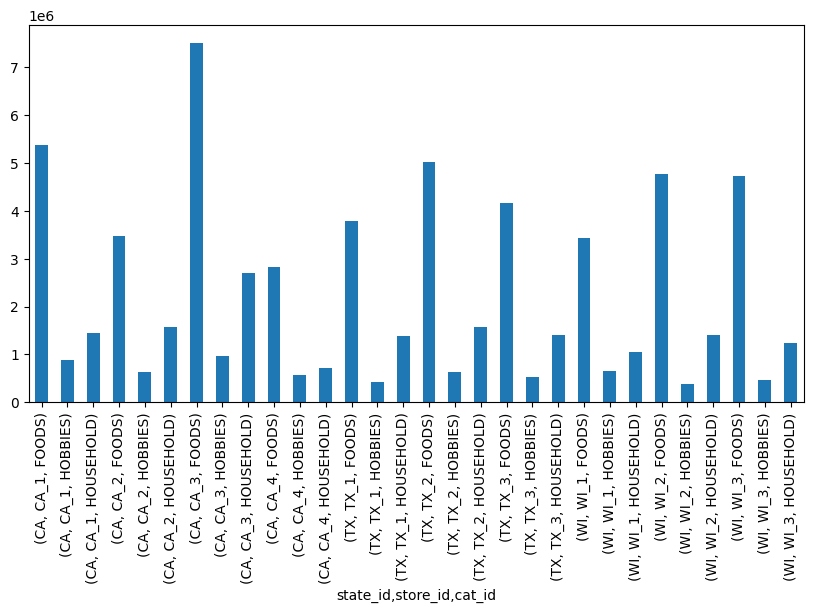

In [ ]:
plt.figure(num=None, figsize=(10,5), dpi=100, facecolor='w', edgecolor='k')
(F.sum(axis=1)).plot.bar()
plt.show()

## Doanh thu bán theo Chi nhánh

In [ ]:
F = X.groupby(['store_id'])[(X.columns)[:-6]].sum()
F

,2011-01-01,2011-02-01,2011-03-01,2011-04-01,2011-05-01,2011-06-01,2011-07-01,2011-08-01,2011-09-01,2011-10-01,...,2015-07-01,2015-08-01,2015-09-01,2015-10-01,2015-11-01,2015-12-01,2016-01-01,2016-02-01,2016-03-01,2016-04-01
store_id,,,,,,,,,,,,,,,,,,,,,
CA_1,11308,89434,93468,91553,87988,90376,96761,95113,92339,105153,...,142973,146168,134939,141987,123590,123656,131598,126655,136557,112847
CA_2,8661,67686,73964,72803,68305,69380,79056,75129,74779,81947,...,117409,128546,122909,131550,117037,120398,128709,121210,126302,110521
CA_3,13351,119792,127344,122428,120711,129867,139377,144376,142568,160365,...,203757,212729,197867,198226,170986,167423,189217,185822,196350,155316
CA_4,4788,41189,44902,44220,44562,43325,46989,46818,51608,58868,...,76812,78229,75816,79262,70434,68080,75868,72017,79721,64733
TX_1,7065,62534,66890,66435,67920,69945,75252,79759,75458,79432,...,106333,103796,93635,96230,88531,89279,93112,93504,100805,81819
TX_2,10520,84900,89902,87683,86128,89914,97076,102564,98961,109783,...,121879,121388,113645,119608,109508,111871,116650,121410,125617,96975
TX_3,8261,64581,68370,66563,67572,75794,83800,86326,81752,87136,...,119295,120029,110554,118225,105675,104831,112028,113196,117252,93751
WI_1,6460,46592,49747,46898,45269,46776,49447,46683,47537,52114,...,110997,109018,102060,111776,102489,110443,113934,109622,114348,95912
WI_2,6196,51708,51113,47651,45487,50737,54426,51072,49721,52652,...,128387,132135,134317,139328,120937,126354,140948,154084,159236,135231


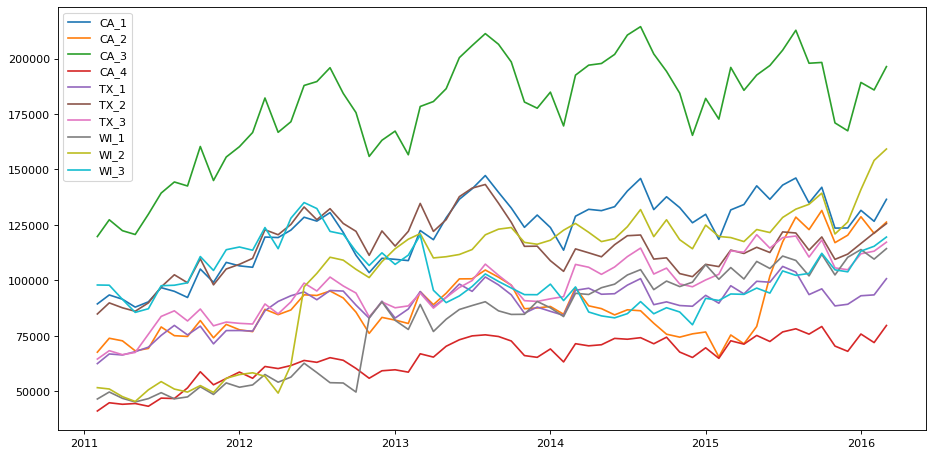

In [ ]:
plt.figure(num=None, figsize=(14, 7), dpi=80, facecolor='w', edgecolor='k')
for i in range(10):
    plt.plot(F.iloc[i,1:-1],label=F.index[i])
    plt.legend(loc='best')
plt.show()